<a href="https://colab.research.google.com/github/Alicja-W/inzopr0kalkulator2020/blob/master/Kopia_IT2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import wszystkich potrzebnych bibliotek

In [4]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import plotly.express as px
plt.style.use('ggplot')

# Wczytanie pliku xlsx

In [5]:
df=pd.read_excel('/content/IT2020.xls')

In [6]:
df.head(3)

,Timestamp,Age,Gender,City,Position,Total years of experience,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,Yearly brutto salary (without bonus and stocks) in EUR,Yearly bonus + stocks in EUR,Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,–°ontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
0,10/12/2020 14:44:21,41.0,Male,Munich,Software Engineer,15.0,Senior,Kotlin,"Python, Java / Scala, SQL, AWS",99000.0,1200,99000.0,3300,39,Full-time employee,Unlimited contract,German,1000+,Product,No,NaN,NaN
1,24/11/2020 14:13:21,38.0,Male,Frankfurt,Tech Lead,16.0,Lead,.Net,"Javascript / Typescript, .NET, SQL, AWS, Azure...",99000.0,112000,NaN,NaN,25,Full-time employee,NaN,English,101-1000,Fintech,No,NaN,NaN
2,25/11/2020 14:37:25,31.0,Male,Berlin,Software Engineer,9.0,Lead,javascript,"AWS, Docker",99000.0,99000,89000.0,89000,30,Full-time employee,Unlimited contract,English,101-1000,Startup,No,NaN,NaN


# Nazwanie zmiennych

In [7]:
df.columns = 'Date',	'Age',	'Gender',	'City',	'Position', 'Years_of_experience',	'Seniority',	'Programming_language', 'Other_programming_language', 'Yearly_brutto_salary',	'Yearly_bonus+stocks',	'Yearly_brutto_salary_year_ago_if_applicable',	'Yearly_bonus+stock_year_ago_if_applicable', 'Vacation_days',	'Employment_status','Contract_duration',	'Company_main_language' ,	'Company_size',	'Company_type',	'Covid_unemployed','Hours_shortage', 'Home_office_support'

In [8]:
df.head(3)

,Date,Age,Gender,City,Position,Years_of_experience,Seniority,Programming_language,Other_programming_language,Yearly_brutto_salary,Yearly_bonus+stocks,Yearly_brutto_salary_year_ago_if_applicable,Yearly_bonus+stock_year_ago_if_applicable,Vacation_days,Employment_status,Contract_duration,Company_main_language,Company_size,Company_type,Covid_unemployed,Hours_shortage,Home_office_support
0,10/12/2020 14:44:21,41.0,Male,Munich,Software Engineer,15.0,Senior,Kotlin,"Python, Java / Scala, SQL, AWS",99000.0,1200,99000.0,3300,39,Full-time employee,Unlimited contract,German,1000+,Product,No,NaN,NaN
1,24/11/2020 14:13:21,38.0,Male,Frankfurt,Tech Lead,16.0,Lead,.Net,"Javascript / Typescript, .NET, SQL, AWS, Azure...",99000.0,112000,NaN,NaN,25,Full-time employee,NaN,English,101-1000,Fintech,No,NaN,NaN
2,25/11/2020 14:37:25,31.0,Male,Berlin,Software Engineer,9.0,Lead,javascript,"AWS, Docker",99000.0,99000,89000.0,89000,30,Full-time employee,Unlimited contract,English,101-1000,Startup,No,NaN,NaN


# Usunięcie niepotrzebnych kolumn

In [9]:
df = df.drop(['Hours_shortage', 'Home_office_support', 'Yearly_bonus+stocks','Yearly_bonus+stock_year_ago_if_applicable', 'Yearly_brutto_salary_year_ago_if_applicable', 'Other_programming_language', 'Covid_unemployed'], axis=1)

# Sprawdzenie braków danych


In [10]:
def percent_missing(df):
    percent_nan = 100 * df.isna().sum()/ len(df)
    percent_nan = percent_nan[percent_nan >0].sort_values()
    
    return percent_nan

In [11]:
percent_missing(df)

Yearly_brutto_salary      0.081301
Position                  0.406504
Gender                    0.731707
Seniority                 0.813008
Years_of_experience       1.219512
Company_main_language     1.300813
Employment_status         1.382114
Company_size              1.463415
Company_type              2.032520
Age                       2.113821
Contract_duration         2.357724
Vacation_days             5.284553
Programming_language     10.000000
dtype: float64

In [12]:
df = df.dropna(axis=0, subset=['Programming_language', 'Vacation_days', 'Contract_duration', 'Age', 'Company_type', 'Company_size', 'Employment_status', 'Company_main_language', 'Years_of_experience', 'Seniority', 'Gender', 'Position', 'Yearly_brutto_salary' ])

In [13]:
df.isnull().sum()

Date                     0
Age                      0
Gender                   0
City                     0
Position                 0
Years_of_experience      0
Seniority                0
Programming_language     0
Yearly_brutto_salary     0
Vacation_days            0
Employment_status        0
Contract_duration        0
Company_main_language    0
Company_size             0
Company_type             0
dtype: int64

In [14]:
df.dtypes

Date                      object
Age                      float64
Gender                    object
City                      object
Position                  object
Years_of_experience      float64
Seniority                 object
Programming_language      object
Yearly_brutto_salary     float64
Vacation_days             object
Employment_status         object
Contract_duration         object
Company_main_language     object
Company_size              object
Company_type              object
dtype: object

In [15]:
df['Date'] = df['Date'].astype('datetime64')
df['Age'] = df['Age'].astype('int64')

In [16]:
df['Age'].describe()

count    1016.000000
mean       32.395669
std         5.528158
min        20.000000
25%        29.000000
50%        32.000000
75%        35.000000
max        66.000000
Name: Age, dtype: float64

In [17]:
age_cat = df

def change_to_salary_category(x):
    x = int(x)
    if x < 25:
        return "20-24"
    elif 25 <= x < 30:
        return "25-29"
    elif 30 <= x < 35:
        return "30-34"
    elif 35 <= x < 40:
        return "35-39"
    elif 40 <= x < 45:
        return "40-44"
    else:
        return "45+"
age_cat['age_cat'] = age_cat['Age'].apply(lambda x: change_to_salary_category(x))

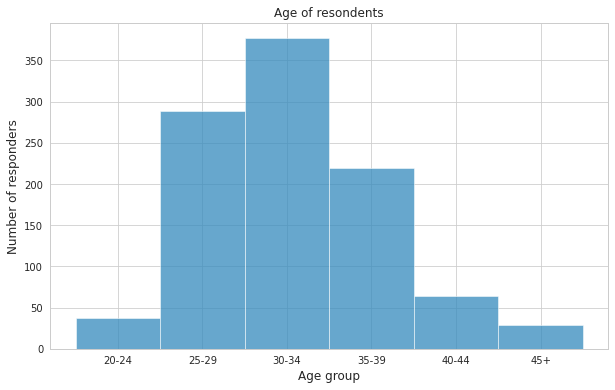

In [18]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
sns.histplot(df["age_cat"].sort_values())
plt.title("Age of resondents", size=12)
plt.xlabel('Age group')
plt.ylabel('Number of responders')
plt.show()

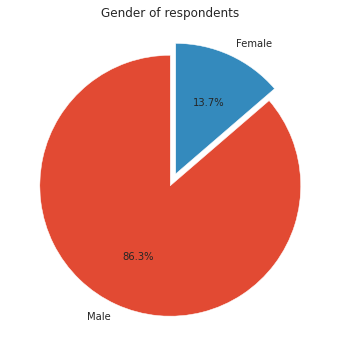

In [19]:
gender_counts = df['Gender'].value_counts()
gender_labels = df['Gender'].unique()
plt.figure(figsize=(10,6))
plt.pie(gender_counts, labels=gender_labels, explode = (0, 0.1), autopct='%1.1f%%', startangle=90)
plt.title("Gender of respondents", size=12)
plt.show()

Text(0, 0.5, 'Years of experience')

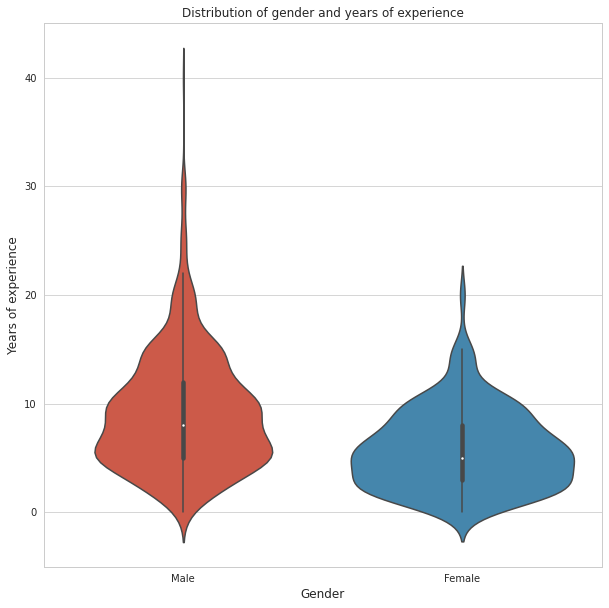

In [20]:
plt.figure(figsize=(10,10))
sns.violinplot(x="Gender", y="Years_of_experience", data=df )
plt.title("Distribution of gender and years of experience", size=12)
plt.xlabel('Gender')
plt.ylabel('Years of experience')

In [21]:
df['Programming_language'].value_counts()

Java                             168
Python                           144
PHP                               51
C++                               35
JavaScript                        29
                                ... 
Aws Hadoop Postgre Typescript      1
SWIFT                              1
DWH                                1
Power BI                           1
PS, Sketch, React, CSS3            1
Name: Programming_language, Length: 234, dtype: int64

In [22]:
df_l = df[(df['Programming_language'] == 'Python') | (df['Programming_language'] == 'Java')]

Text(31.125178571428577, 0.5, 'Yearly brutto salary')

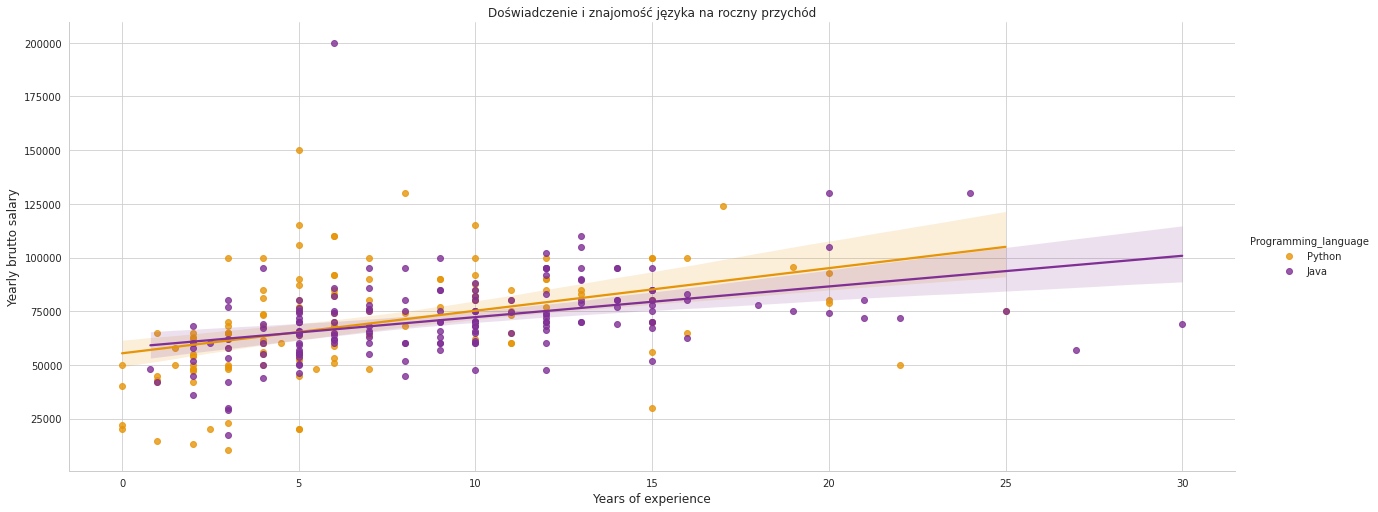

In [23]:
cmap = "CMRmap_r"
sns.lmplot(x="Years_of_experience", y="Yearly_brutto_salary", data=df_l, hue = 'Programming_language',height=7, aspect=10/4, palette=cmap)
plt.title("Doświadczenie i znajomość języka na roczny przychód", size=12)
plt.xlabel('Years of experience')
plt.ylabel('Yearly brutto salary')


In [24]:
df['City'].value_counts().sort_values()

Tuttlingen      1
Dusseldurf      1
Innsbruck       1
Tampere         1
Luttich         1
             ... 
Stuttgart      18
Hamburg        30
Frankfurt      35
Munich        196
Berlin        554
Name: City, Length: 97, dtype: int64

In [88]:
df_c = df[(df['City'] == 'Berlin') | (df['Position'] == 'Software engineer')]
median_c = df_c.groupby('Years_of_experience')['Yearly_brutto_salary'].median()
df_median = median_c.to_frame()
df_median = df_median.rename({ 
    "Yearly_brutto_salary": "Median_salary",
}, axis=1)

Text(-15.665, 0.5, 'Yearly brutto salary')

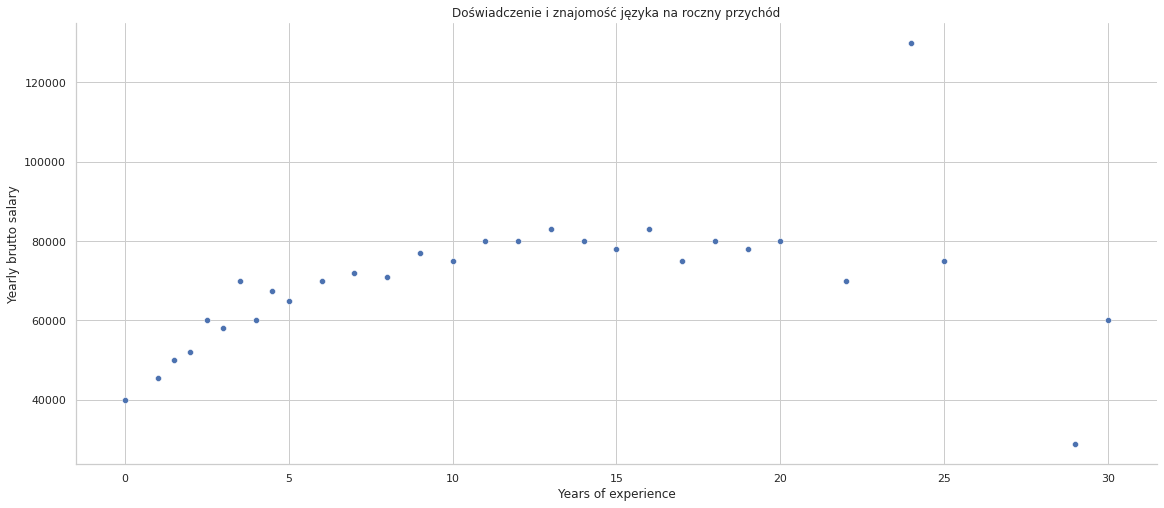

In [90]:
sns.relplot(x="Years_of_experience", y="Median_salary", data=df_median, height=7, aspect=7/3)
plt.title("Doświadczenie i znajomość języka na roczny przychód", size=12)
plt.xlabel('Years of experience')
plt.ylabel('Yearly brutto salary')

In [27]:
df_s = df[(df['Seniority'] == 'Senior') | (df['Seniority'] == 'Lead') | (df['Seniority'] == 'Middle') | (df['Seniority'] == 'Junior')]

Text(0.5, 6.79999999999999, 'Yearly salary in EUR')

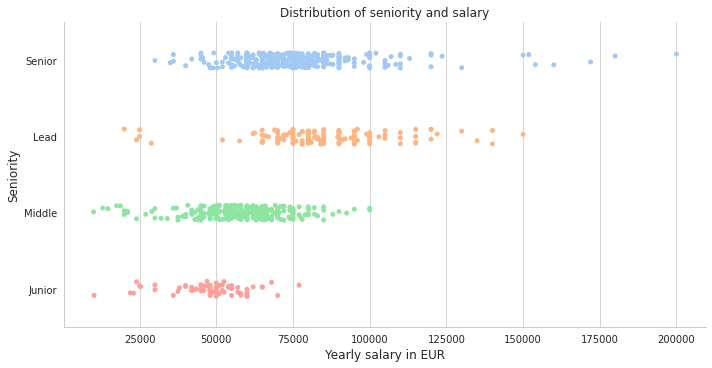

In [28]:
cmap = "pastel"
sns.catplot(y="Seniority", x="Yearly_brutto_salary", data=df_s, height=5, aspect=10/5, palette=cmap)
plt.title("Distribution of seniority and salary", size=12,)
plt.ylabel('Seniority')
plt.xlabel('Yearly salary in EUR')


Text(0, 0.5, 'Years of experience')

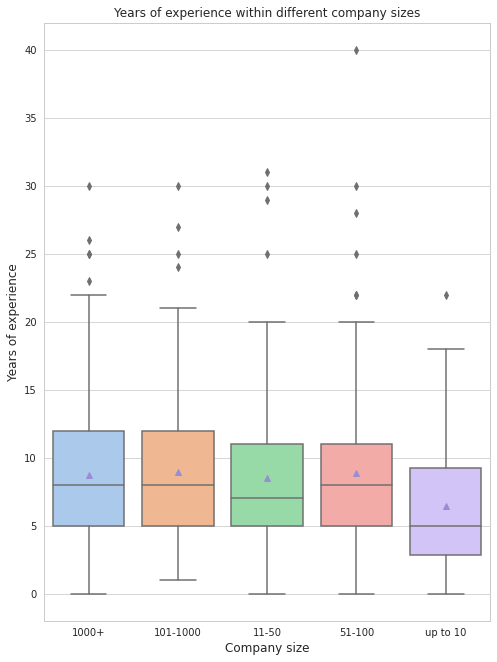

In [29]:
plt.figure(figsize=(8,11))
cmap = "pastel"
sns.boxplot(x="Company_size", y="Years_of_experience", data=df, showmeans = True, palette=cmap )
plt.title("Years of experience within different company sizes", size=12)
plt.xlabel('Company size')
plt.ylabel('Years of experience')

In [30]:
df['Company_type'].value_counts()

Product                                  648
Startup                                  201
Consulting / Agency                      108
Bank                                       4
Media                                      3
Corporation                                2
Finance                                    2
University                                 2
E-commerce                                 2
Research                                   2
IT-Outsourcing                             1
Biergarten                                 1
E-Commerce                                 1
Science Institute                          1
e-commerce                                 1
SaaS                                       1
Market Research                            1
Fintech                                    1
Outsourse                                  1
Bank                                       1
Consulting and Product                     1
Transport & Logistics                      1
Telecommun

In [31]:
df_t = df[(df['Company_type'] == 'Product') | (df['Company_type'] == 'Startup') | (df['Company_type'] == 'Consulting / Agency')]

In [32]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
sns.set(style="whitegrid")
import math

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

from IPython.display import HTML

Text(35.798234523809526, 0.5, 'Yearly brutto salary')

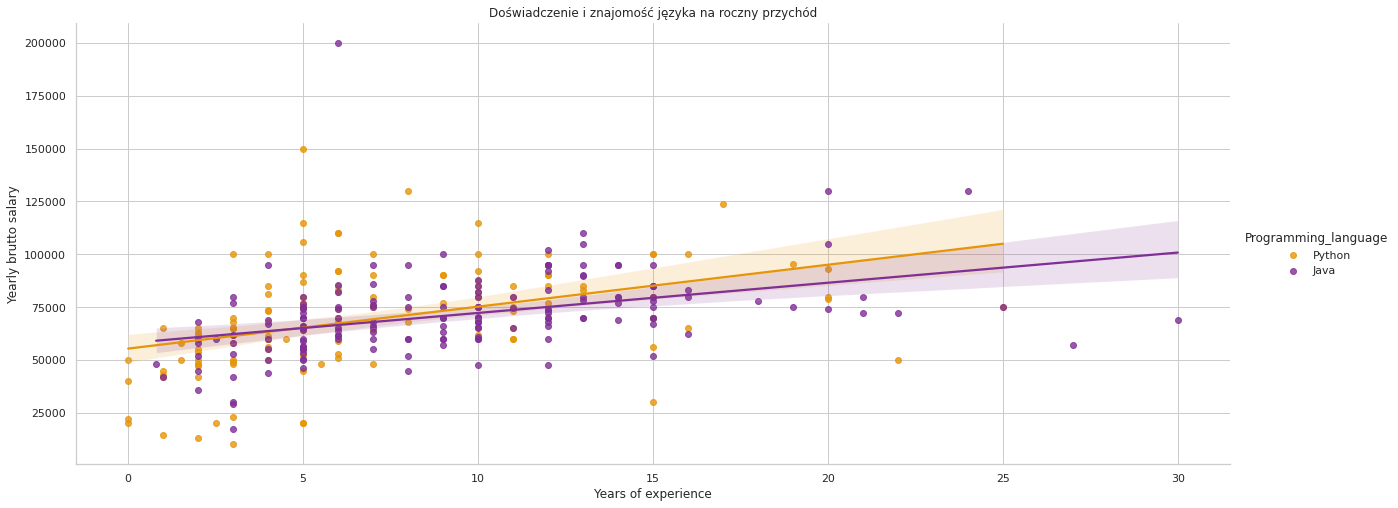

In [33]:
cmap = "CMRmap_r"
sns.lmplot(x="Years_of_experience", y="Yearly_brutto_salary", data=df_l, hue = 'Programming_language',height=7, aspect=10/4, palette=cmap)
plt.title("Doświadczenie i znajomość języka na roczny przychód", size=12)
plt.xlabel('Years of experience')
plt.ylabel('Yearly brutto salary')

In [75]:
import plotly.express as px

In [92]:
px.scatter(df, x='Years_of_experience', y='Yearly_brutto_salary', color='Company_size', trendline="ols")

In [100]:
fig = px.bar(df, 'City' )
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)